In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

df = pd.read_csv('AirQualityUCI.csv',sep=';')
df = df.dropna(axis=0, how='all')

In [21]:
#controllo che non ci siano "buchi" orari
time=[int(df['Time'][i][:2]) for i in range(len(df))]
for i in range(len(time)-1):
    if ((time[i]!=23 and time[i+1]!=time[i]+1) or (time[i]==23 and time[i+1]!=0)):
        print("errore "+str(i))

In [22]:
pt=df[['Date','Time','PT08.S1(CO)']]
pt.columns=['Date','Time','PT']

In [23]:
#converto la colonna tempo in interi
pt['Time']=[int(pt.Time[i][:2]) for i in range(len(pt))]

/home/gambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#droppo primo e ultimo gg
#tabella 24col e x righe
#11/3/2004       3/4/2005
pt = pt[6:9342].reset_index().drop(['index'], axis=1)

In [25]:
#numero dei giorni
#389*24
len(pt)/24

389.0

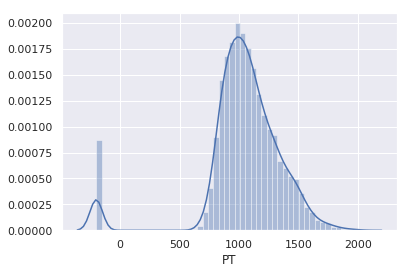

In [26]:
sns.distplot(pt.PT)

In [27]:
pt.PT[pt.PT>0].describe()

count    8970.000000
mean     1099.703790
std       217.120884
min       647.000000
25%       937.000000
50%      1063.000000
75%      1231.000000
max      2040.000000
Name: PT, dtype: float64

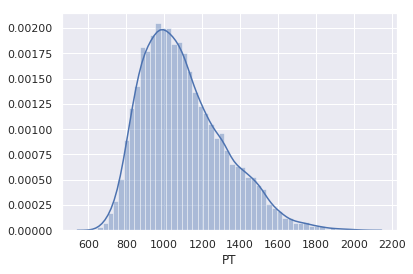

In [28]:
sns.distplot(pt.PT[pt.PT>0])

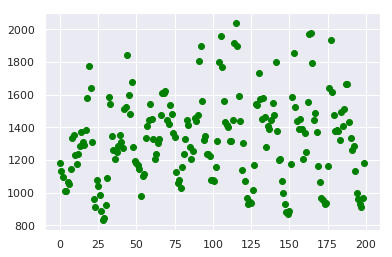

In [29]:
plt.scatter(pt[:200].index,pt[:200].PT, color='green')

In [30]:
#contiamo i -200

sum(pt.PT<0)

366

In [31]:
#creiamo ts tabella delle serie temporali

ts=pd.DataFrame(pt["PT"][0:24])
ts.columns = ['0']
for i in range(388):
    i=i+1
    ts[str(i)]=[i for i in pt["PT"][24*i:24*(i+1)]]

ts.head()

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
0,1185.0,1080.0,1280.0,1534.0,1239.0,1304.0,1205.0,1371.0,1287.0,1127.0,...,1320.0,1372.0,1166.0,1106.0,1078.0,1024.0,1013.0,848.0,965.0,929.0
1,1136.0,1044.0,1196.0,1484.0,1239.0,1074.0,1072.0,1161.0,1134.0,1090.0,...,1205.0,1312.0,1079.0,1031.0,963.0,938.0,998.0,818.0,838.0,951.0
2,1094.0,988.0,1184.0,1367.0,1224.0,968.0,998.0,1064.0,999.0,1017.0,...,1099.0,1205.0,1008.0,1015.0,923.0,905.0,923.0,848.0,835.0,938.0
3,1010.0,889.0,1172.0,1344.0,1078.0,929.0,933.0,970.0,961.0,997.0,...,1106.0,1167.0,1034.0,1003.0,853.0,826.0,904.0,826.0,820.0,921.0
4,1011.0,831.0,1147.0,1130.0,1078.0,941.0,883.0,954.0,934.0,945.0,...,1099.0,1122.0,1001.0,951.0,883.0,879.0,884.0,818.0,815.0,850.0


In [32]:
#conteggio dei nulli per ogni giorno
giorniNO=[]
giorniFIX=[]

for i in range(len(ts.columns)):
    nulli=sum(ts[ts.columns[i]]<0)
    if nulli>0:
        print("il giorno n."+str(ts.columns[i])+" ha nulli "+str(nulli))
        if nulli>2:
            giorniNO.append(ts.columns[i])
        else:
            giorniFIX.append(ts.columns[i])
    

#fill con media h precedente e h successiva

print(giorniNO)
print(giorniFIX)

il giorno n.21 ha nulli 3
il giorno n.28 ha nulli 1
il giorno n.29 ha nulli 23
il giorno n.75 ha nulli 5
il giorno n.76 ha nulli 9
il giorno n.100 ha nulli 10
il giorno n.101 ha nulli 24
il giorno n.102 ha nulli 4
il giorno n.142 ha nulli 1
il giorno n.151 ha nulli 4
il giorno n.168 ha nulli 18
il giorno n.169 ha nulli 24
il giorno n.170 ha nulli 3
il giorno n.180 ha nulli 1
il giorno n.181 ha nulli 17
il giorno n.204 ha nulli 1
il giorno n.278 ha nulli 7
il giorno n.279 ha nulli 24
il giorno n.280 ha nulli 24
il giorno n.281 ha nulli 20
il giorno n.288 ha nulli 5
il giorno n.297 ha nulli 3
il giorno n.298 ha nulli 24
il giorno n.299 ha nulli 24
il giorno n.300 ha nulli 1
il giorno n.323 ha nulli 7
il giorno n.324 ha nulli 2
il giorno n.334 ha nulli 7
il giorno n.335 ha nulli 24
il giorno n.336 ha nulli 24
il giorno n.337 ha nulli 21
il giorno n.365 ha nulli 1
['21', '29', '75', '76', '100', '101', '102', '151', '168', '169', '170', '181', '278', '279', '280', '281', '288', '297', '298

In [33]:
#riempio tutti tutti i -200 con la media

tempifix=list(pt['PT'])

for i in range(len(tempifix)):
    if tempifix[i]==-200:
        p=i
        s=i
        while(tempifix[p]==-200):
            p=p-1
        while(tempifix[s]==-200):
            s=s+1
        tempifix[i]=(tempifix[s]+tempifix[p])/2

In [34]:
sum([tempifix[i]<0 for i in range(len(tempifix))])

0

In [35]:
len(tempifix)-24*len(ts.columns)

0

In [36]:
ts=pd.DataFrame(tempifix[0:24])
ts.columns = ['0']
for i in range(388):
    i=i+1
    ts[str(i)]=[i for i in tempifix[24*i:24*(i+1)]]

In [37]:
ts=ts.drop(giorniNO, axis=1)
ts.head()

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
0,1185.0,1080.0,1280.0,1534.0,1239.0,1304.0,1205.0,1371.0,1287.0,1127.0,...,1320.0,1372.0,1166.0,1106.0,1078.0,1024.0,1013.0,848.0,965.0,929.0
1,1136.0,1044.0,1196.0,1484.0,1239.0,1074.0,1072.0,1161.0,1134.0,1090.0,...,1205.0,1312.0,1079.0,1031.0,963.0,938.0,998.0,818.0,838.0,951.0
2,1094.0,988.0,1184.0,1367.0,1224.0,968.0,998.0,1064.0,999.0,1017.0,...,1099.0,1205.0,1008.0,1015.0,923.0,905.0,923.0,848.0,835.0,938.0
3,1010.0,889.0,1172.0,1344.0,1078.0,929.0,933.0,970.0,961.0,997.0,...,1106.0,1167.0,1034.0,1003.0,853.0,826.0,904.0,826.0,820.0,921.0
4,1011.0,831.0,1147.0,1130.0,1078.0,941.0,883.0,954.0,934.0,945.0,...,1099.0,1122.0,1001.0,951.0,883.0,879.0,884.0,818.0,815.0,850.0


In [38]:
#numero di giorni
len(ts.columns)

364

In [39]:
ts.describe()

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1244.166667,1281.666667,1330.666667,1361.125000,1452.166667,1339.666667,1362.833333,1352.666667,1304.291667,1288.625000,...,1341.791667,1216.541667,1106.333333,1079.666667,1163.333333,1106.000000,1008.125000,903.291667,890.958333,981.375000
std,212.486658,279.410508,175.750977,213.514751,300.626978,257.550445,331.116381,262.260685,241.199084,217.372814,...,193.844846,78.958976,79.605367,93.982268,180.123066,153.164305,135.682914,62.984111,39.964636,104.834782
min,913.000000,831.000000,978.000000,1028.000000,1075.000000,929.000000,869.000000,931.000000,913.000000,945.000000,...,980.000000,1085.000000,977.000000,933.000000,853.000000,826.000000,884.000000,818.000000,815.000000,811.000000
25%,1087.000000,1071.000000,1193.000000,1228.000000,1235.250000,1146.750000,1147.750000,1164.750000,1164.750000,1083.500000,...,1188.250000,1160.000000,1031.500000,1022.500000,1021.250000,1005.000000,932.750000,848.000000,874.500000,928.750000
50%,1234.500000,1280.500000,1327.000000,1346.500000,1408.500000,1398.000000,1391.000000,1379.000000,1334.000000,1316.000000,...,1372.500000,1206.000000,1114.500000,1078.500000,1199.500000,1099.500000,978.000000,899.000000,891.500000,954.500000
75%,1337.500000,1513.750000,1448.000000,1463.000000,1639.000000,1539.500000,1530.750000,1500.250000,1448.250000,1457.500000,...,1473.000000,1264.500000,1173.750000,1113.250000,1276.000000,1253.250000,1064.750000,940.000000,913.000000,1016.750000
max,1776.000000,1843.000000,1621.000000,1898.000000,2040.000000,1800.000000,1975.000000,1934.000000,1819.000000,1633.000000,...,1673.000000,1372.000000,1220.000000,1307.000000,1519.000000,1360.000000,1531.000000,1044.000000,965.000000,1248.000000


In [40]:
print("massimo: ",max(ts.describe().T['max']), "e minimo: ", min(ts.describe().T['min']))

massimo:  2040.0 e minimo:  647.0


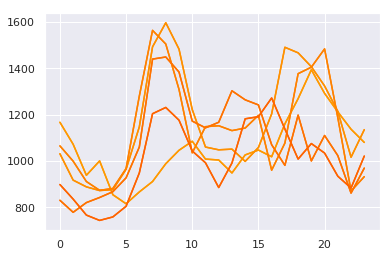

In [41]:
#VISUALIZZA 10 SERIE CONSECUTIVE A PARTIRE DA START

import numpy as np
import matplotlib.pyplot as plt

start=50

k=99
delta=5             #MASSIMO 10

for i in ts.columns[start:start+delta]:
    plt.plot(ts[i], "#ff"+str(k)+"00")
    plt.plot(ts[i], "#ff"+str(k)+"00")
    k=k-9
    

In [42]:
import pickle
PIK = "ts.dat"

with open(PIK, "wb") as f:
    pickle.dump(ts, f)

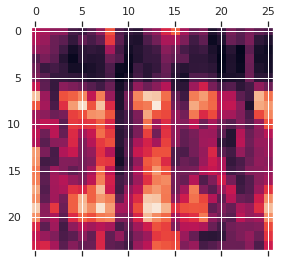

In [44]:
plt.matshow(ts.iloc[:,34:60], interpolation=None, aspect='auto')

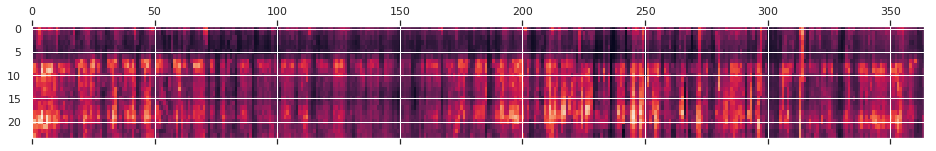

In [45]:
plt.matshow(ts, interpolation=None, aspect='auto')
